### Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import pmdarima as pm
from prophet import Prophet

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR

from datetime import date
from datetime import timedelta

import plotly.express as px
import plotly.graph_objs as go 

### Dataset

In [2]:
forex = "EURUSD=X"

In [3]:
# set the start and end date for the historical data
start_date = '2004-01-01'
end_date = date.today().strftime("%Y-%m-%d")

In [4]:
yf.pdr_override()

In [5]:
# download dataframe
df = pdr.get_data_yahoo(forex, start=start_date, end=end_date, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [6]:
# save the data to a CSV file
path = "data/" + forex + ".csv"
df.to_csv(path, index=True)

In [7]:
df = pd.read_csv("data/EURUSD=X.csv", index_col = "Date")
df.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [8]:
df.shape

(5012, 6)

In [9]:
df.tail()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-04-21  1.097093  1.099251  1.093972  1.097093   1.097093       0
2023-04-24  1.099227  1.103424  1.096876  1.099227   1.099227       0
2023-04-25  1.105950  1.106807  1.096924  1.105950   1.105950       0
2023-04-26  1.097839  1.109410  1.096924  1.097839   1.097839       0
2023-04-27  1.104728  1.106562  1.099421  1.104728   1.104728       0

In [10]:
df.describe()

Open         High          Low        Close    Adj Close  Volume
count  5012.000000  5012.000000  5012.000000  5012.000000  5012.000000  5012.0
mean      1.242143     1.246802     1.237035     1.242154     1.242154     0.0
std       0.125904     0.126598     0.126345     0.125899     0.125899     0.0
min       0.959619     0.967006     0.072902     0.959619     0.959619     0.0
25%       1.132314     1.136000     1.128824     1.132378     1.132378     0.0
50%       1.230777     1.235010     1.225888     1.230800     1.230800     0.0
75%       1.334085     1.338218     1.328555     1.334018     1.334018     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0

In [11]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Basic Visualization

In [12]:
columns = ["Open", "High", "Low", "Close", "Adj Close"]
for col in columns:
    title = "Line chart of " + col
    fig = px.line(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [13]:
for col in columns:
    title = "Area chart of " + col
    fig = px.area(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [14]:
# for col in columns:
#     title = "Histogram of " + col
#     fig = px.histogram(df, x=df.index, y=col, title = title)
#     fig.update_traces(xbins_size="M12")
#     fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12", tickformat="%b\n%Y")
#     fig.update_layout(bargap=0.5)
#     fig.show()

In [15]:
# result = seasonal_decompose(df['Open'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

In [16]:
# result = seasonal_decompose(df['Close'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

[1.         0.9969685  0.99516436 0.993551   0.99187402 0.99016298
 0.98846734 0.98690735 0.98505576 0.983048   0.98127673 0.97950145
 0.9776345  0.97572066 0.97393979 0.97210188 0.97016285 0.96830834
 0.96634213 0.96447889 0.96248947 0.96059808 0.9588867  0.95714865
 0.95505762 0.95311484 0.95130007 0.9494854  0.94759544 0.94569867
 0.94359732 0.9415896  0.93987013 0.93800816 0.93608321 0.93427251
 0.93242474 0.93045346]


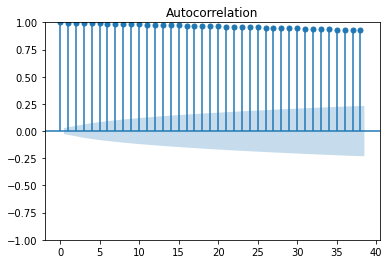

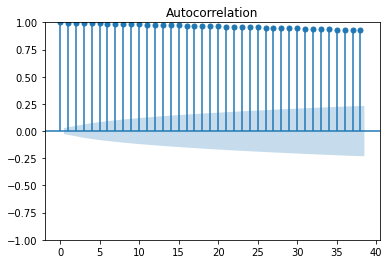

In [17]:
acf_values = acf(df['Close'])
print(acf_values)
plot_acf(df['Close'])

[ 1.00000000e+00  9.97167452e-01  2.15430644e-01  8.35946284e-02
  1.49094723e-02 -3.33634671e-03 -6.30173218e-04  2.43412096e-02
 -4.33140452e-02 -5.00650616e-02  1.86873718e-02  8.83295409e-03
 -1.10661672e-02 -1.52812094e-02  1.43302936e-02 -2.04296491e-03
 -1.52099493e-02  4.25201944e-03 -2.27692773e-02  1.16528302e-02
 -1.64563558e-02  7.55364645e-03  3.50604175e-02  1.58758443e-02
 -6.10061534e-02 -2.59904983e-03  2.13445872e-02  1.30528292e-02
 -7.57061894e-03 -1.29168053e-02 -4.76010947e-02  5.10544204e-03
  5.96073325e-02 -8.44146381e-03 -1.80829765e-02  1.76492391e-02
 -2.70410347e-04 -2.21044656e-02]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



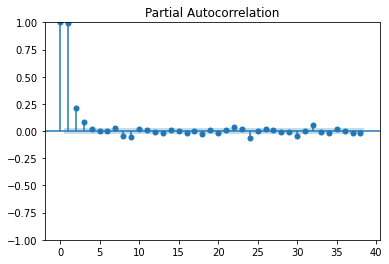

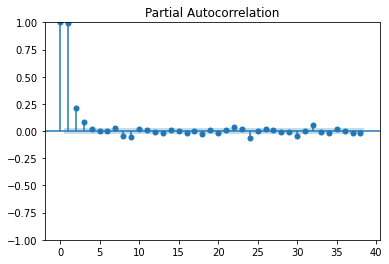

In [18]:
pacf_values = pacf(df['Close'])
print(pacf_values)
plot_pacf(df['Close'])

[1.         0.99700084 0.99515434 0.9934283  0.99173323 0.99008854
 0.98846421 0.98676601 0.98509125 0.98309601 0.98120243 0.97939227
 0.97753196 0.97571751 0.97385545 0.97198815 0.97021719 0.9682788
 0.96629229 0.96435936 0.96256539 0.96052825 0.95883864 0.9570442
 0.95501452 0.95308845 0.95132155 0.94960264 0.94762211 0.94567769
 0.94374386 0.94183249 0.9398769  0.93806921 0.93630608 0.93441121
 0.93251435 0.93060666]


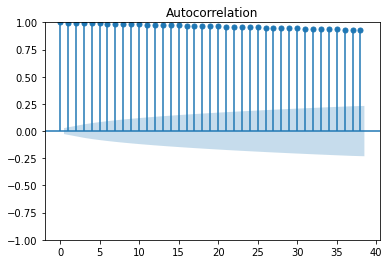

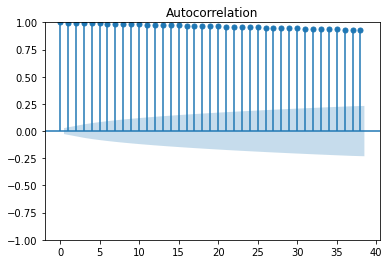

In [19]:
acf_values = acf(df['Open'])
print(acf_values)
plot_acf(df['Open'])

[ 1.00000000e+00  9.97199802e-01  2.04586100e-01  6.56704837e-02
  2.41782189e-02  1.68490016e-02  9.91184816e-03 -1.02853370e-02
 -7.63473895e-04 -6.10545847e-02 -8.62539110e-03  1.10997139e-02
 -5.37549152e-03  5.00743384e-03 -7.26541172e-03 -2.80627678e-03
  1.63203187e-02 -2.20464048e-02 -2.11147704e-02 -1.54989852e-03
  2.66212775e-02 -3.59222930e-02  4.94897189e-02  2.36529782e-03
 -4.55249408e-02  2.68842478e-03  3.15945334e-02  2.05932408e-02
 -4.58243294e-02 -8.62227410e-03 -7.21518269e-03  2.92709948e-03
 -3.34458948e-03  2.01927149e-02  1.67812689e-02 -1.82741284e-02
 -5.28802842e-03 -2.00245640e-03]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



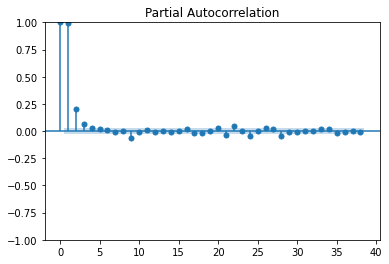

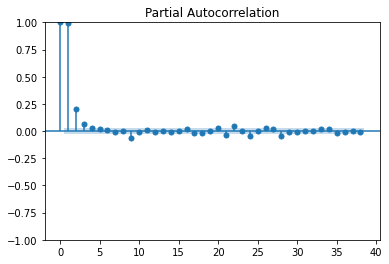

In [20]:
pacf_values = pacf(df['Open'])
print(pacf_values)
plot_pacf(df['Open'])

### Preprocessing (Close)

In [21]:
def adf(col):
    adf = adfuller(df.loc[:, col].values, autolag = 'AIC')
    print("ADF Statistic:", adf[0])
    print("p-value:", adf[1])
    print("n_lags:", adf[2])
    for key, value in adf[4].items():
        print("Critical values:", key, value)
    if(adf[1]<0.05):
        print("Stationary data")
    else:
        print("Non-stationary data") 

In [22]:
adf('Close')

ADF Statistic: -1.8979597328863538
p-value: 0.3330215246938284
n_lags: 31
Critical values: 1% -3.431663789936872
Critical values: 5% -2.8621205525733524
Critical values: 10% -2.567079028926953
Non-stationary data


In [23]:
adf('Open')

ADF Statistic: -1.9537926014982074
p-value: 0.30719343281698136
n_lags: 27
Critical values: 1% -3.4316627349870146
Critical values: 5% -2.8621200865028813
Critical values: 10% -2.5670787808193283
Non-stationary data


<AxesSubplot:xlabel='Date'>

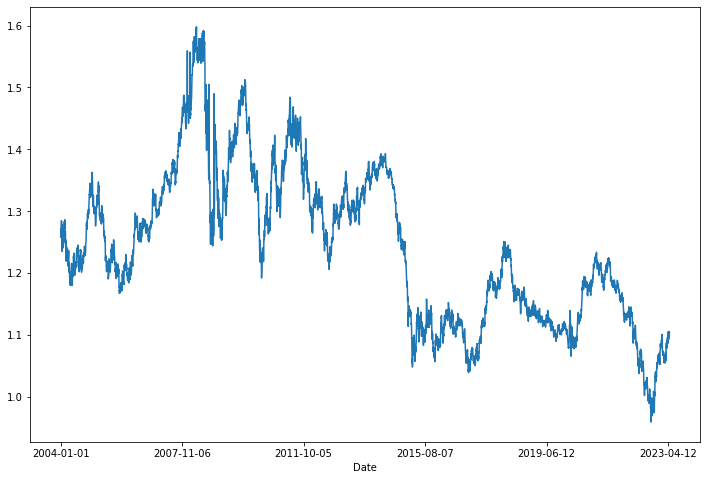

In [24]:
df['Open'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

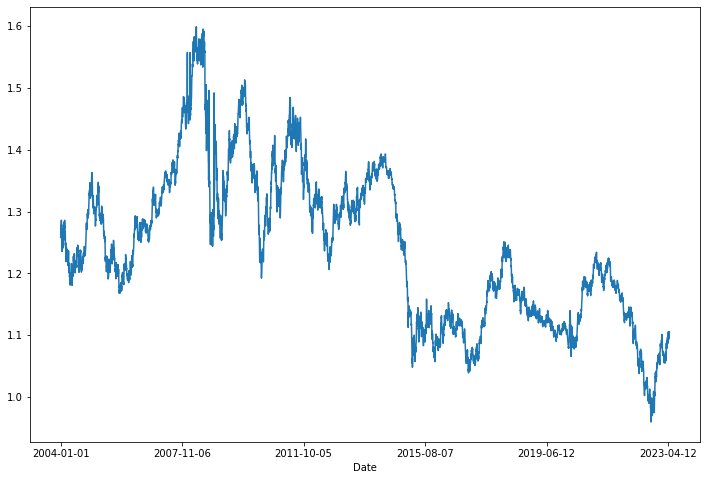

In [25]:
df['Close'].plot(figsize=(12,8))

In [26]:
df["Close_diff1"] = df["Close"].diff(periods=100)
df["Close_diff2"] = df["Close"].diff(periods=200)
df["Close_diff3"] = df["Close"].diff(periods=300)

df["Open_diff1"] = df["Open"].diff(periods=100)
df["Open_diff2"] = df["Open"].diff(periods=200)
df["Open_diff3"] = df["Open"].diff(periods=300)

In [27]:
# df = df.dropna()

In [28]:
# results = adfuller(df["Close_diff1"].dropna())
# results

<AxesSubplot:xlabel='Date'>

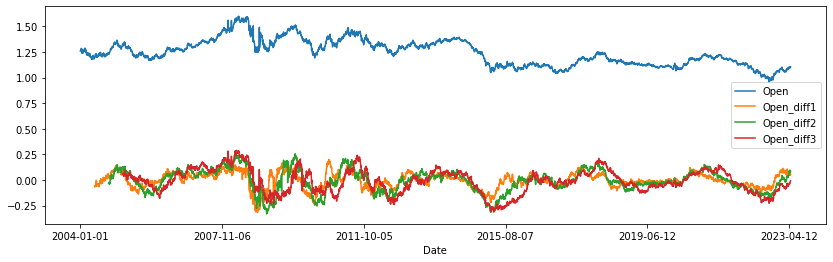

In [29]:
df.plot(y = ["Open", "Open_diff1", "Open_diff2", "Open_diff3"],figsize=(14, 4))

<AxesSubplot:xlabel='Date'>

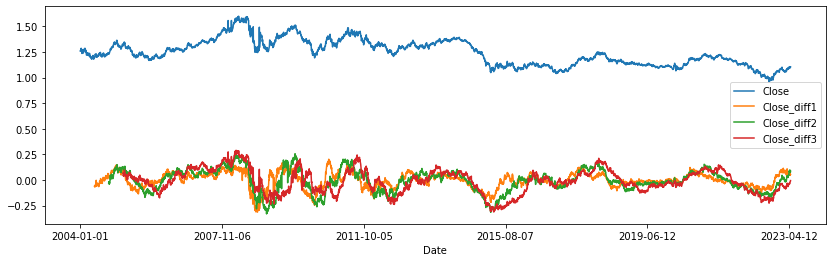

In [30]:
df.plot(y = ["Close", "Close_diff1", "Close_diff2", "Close_diff3"],figsize=(14, 4))

In [31]:
df = df.dropna()
print("--------------OPEN---------------")
print(adf('Open_diff1'))
print(adf('Open_diff2'))
print(adf('Open_diff3'))
print("--------------CLOSE---------------")
print(adf('Close_diff1'))
print(adf('Close_diff2'))
print(adf('Close_diff3'))

--------------OPEN---------------
ADF Statistic: -4.868931226356312
p-value: 4.00701776406009e-05
n_lags: 25
Critical values: 1% -3.4317462624364112
Critical values: 5% -2.862156987914191
Critical values: 10% -2.567098424977626
Stationary data
None
ADF Statistic: -3.670807144690876
p-value: 0.0045430274125319945
n_lags: 8
Critical values: 1% -3.4317412125882276
Critical values: 5% -2.8621547569820738
Critical values: 10% -2.5670972373545253
Stationary data
None
ADF Statistic: -3.421479404301977
p-value: 0.010248073668335762
n_lags: 27
Critical values: 1% -3.4317468589474043
Critical values: 5% -2.8621572514417712
Critical values: 10% -2.567098565264968
Stationary data
None
--------------CLOSE---------------
ADF Statistic: -4.582767571634688
p-value: 0.00013895348692386723
n_lags: 31
Critical values: 1% -3.431748053499747
Critical values: 5% -2.862157779172856
Critical values: 10% -2.5670988461995035
Stationary data
None
ADF Statistic: -3.6591940085757497
p-value: 0.004725145157351044
n

In [32]:
# change filter value for open
df_close = df.filter(['Close', 'Close_diff1'])

# change df_close to open for open
# also ctrl+f and change close to open everywhere for open
close_dataset = df_close.values

train_close_len = math.ceil(len(close_dataset) * 0.8)
test_close_len = len(close_dataset) - train_close_len
print("Training length is: ", train_close_len)
print("Testing length is: ", test_close_len)

Training length is:  3770
Testing length is:  942


In [33]:
# # Creating the training/testing data

train_data_close = pd.DataFrame(df_close['Close'][0:math.ceil(len(close_dataset)*0.80)])
test_data_close = pd.DataFrame(df_close['Close'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

print("Training length is: ", train_data_close.shape)
print("Testing length is: ", test_data_close.shape)


Training length is:  (3770, 1)
Testing length is:  (942, 1)


In [34]:
stationary_test_data_close

Close_diff1
Date                   
2019-09-18    -0.011050
2019-09-19    -0.018460
2019-09-20    -0.015234
2019-09-23    -0.015452
2019-09-24    -0.019209
...                 ...
2023-04-21     0.044251
2023-04-24     0.044809
2023-04-25     0.056258
2023-04-26     0.050938
2023-04-27     0.053402

[942 rows x 1 columns]

In [35]:
# Scaling training data

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled_close_data = scaler.fit_transform(train_data_close)
# stationary_train_scaled_close_data = scaler.fit_transform(stationary_train_data_close)
train_scaled_close_data

array([[0.51015828],
       [0.50496611],
       [0.49691057],
       ...,
       [0.11930375],
       [0.12379249],
       [0.10995443]])

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
test_scaled_close_data = scaler.fit_transform(test_data_close)
# stationary_test_scaled_close_data = scaler.fit_transform(stationary_test_data_close)
test_scaled_close_data

array([[0.53863041],
       [0.52287476],
       [0.52909121],
       [0.51835814],
       [0.50913423],
       [0.51756165],
       [0.49426323],
       [0.48327958],
       [0.49055135],
       [0.47486519],
       [0.48771803],
       [0.49820008],
       [0.50245266],
       [0.50653804],
       [0.50126791],
       [0.49688722],
       [0.50697797],
       [0.51544057],
       [0.52235188],
       [0.52198838],
       [0.52407254],
       [0.53871987],
       [0.55775529],
       [0.56815656],
       [0.56670646],
       [0.55852225],
       [0.55965053],
       [0.54929313],
       [0.54211864],
       [0.54754206],
       [0.55324995],
       [0.56770316],
       [0.56865513],
       [0.5721047 ],
       [0.55825168],
       [0.53845192],
       [0.5370674 ],
       [0.518597  ],
       [0.51959717],
       [0.52433832],
       [0.51592654],
       [0.51623576],
       [0.51888884],
       [0.53149414],
       [0.53778181],
       [0.54056648],
       [0.54015043],
       [0.535

### Models

#### Some functions

In [37]:
# Metrics
def metrics(test, predictions):
    mse = mean_squared_error(test, predictions, squared = True)
    rmse = math.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)

In [38]:
def pred_plot(test, pred):
    plt.plot(test)
    plt.plot(pred, color='red')
    plt.show()

#### Auto Regressive

In [39]:
ar_model = AutoReg(train_scaled_close_data, lags = test_data_close.shape[0])
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [-6.47471511e-06  8.58394991e-01  1.15803850e-01  6.80402340e-03
 -1.39610763e-02  4.03854707e-03  2.03611040e-02  6.03056791e-02
 -3.26388594e-02 -2.39461174e-02  3.10961807e-02 -4.44709967e-02
 -1.42449463e-02  3.31923375e-02 -4.96912070e-03 -1.36089493e-02
 -3.81755956e-04  4.77883366e-02 -2.47738718e-02 -5.60412399e-03
 -5.37585221e-03 -4.65465714e-03 -1.49147440e-02  7.21238852e-02
 -3.64859791e-02 -5.63739654e-02  2.59726538e-02  2.14327810e-02
  8.65199381e-03  2.37659171e-02 -8.80820082e-02  5.39650954e-02
  3.76740800e-03 -8.71166528e-03 -3.91205696e-02  8.36829954e-02
 -6.14138604e-02  5.60008239e-02 -4.97289218e-02  6.99391014e-03
  1.08560342e-02 -5.06735544e-02 -3.90327517e-02  2.35482341e-01
 -1.89023730e-01  1.03754332e-02  1.89544938e-02 -4.40139922e-02
  8.11146902e-02 -4.73369306e-02  3.38675312e-02 -1.72117269e-02
 -2.86432782e-02  6.20299352e-03  3.56615990e-02  2.33083367e-02
 -2.25625803e-02 -4.13433114e-02  4.35479153e-02  3.33183785e-02
 -5.4834010

In [40]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.108804, expected=0.538630
predicted=0.113612, expected=0.522875
predicted=0.110914, expected=0.529091
predicted=0.111871, expected=0.518358
predicted=0.100066, expected=0.509134
predicted=0.103150, expected=0.517562
predicted=0.091361, expected=0.494263
predicted=0.100729, expected=0.483280
predicted=0.100057, expected=0.490551
predicted=0.090069, expected=0.474865
predicted=0.092843, expected=0.487718
predicted=0.096092, expected=0.498200
predicted=0.097786, expected=0.502453
predicted=0.101113, expected=0.506538
predicted=0.093169, expected=0.501268
predicted=0.095545, expected=0.496887
predicted=0.086208, expected=0.506978
predicted=0.090239, expected=0.515441
predicted=0.087924, expected=0.522352
predicted=0.087777, expected=0.521988
predicted=0.084991, expected=0.524073
predicted=0.078211, expected=0.538720
predicted=0.075992, expected=0.557755
predicted=0.076317, expected=0.568157
predicted=0.072285, expected=0.566706
predicted=0.072502, expected=0.558522
predicted=0.

In [41]:
metrics(test_scaled_close_data, predictions)

MSE: 0.30216723830857195
RMSE: 0.5496974061322938
MAE: 0.5020455513643534


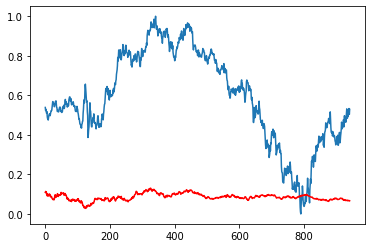

In [42]:
pred_plot(test_scaled_close_data, predictions)

In [43]:
ar_model = AutoReg(train_scaled_close_data, lags = 30)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 9.10181258e-04  7.38455170e-01  1.70561212e-01  7.18346391e-02
  1.90604537e-02 -4.29478047e-03 -6.38554224e-04  7.00660143e-02
 -2.06157452e-02 -6.33644886e-02  1.80062211e-02  1.85015543e-02
 -1.07085849e-02 -2.32898879e-02  1.90960538e-02  1.13210507e-02
 -1.83136659e-02  1.94718941e-02 -3.07977218e-02  3.10227083e-02
 -3.41521797e-02 -2.06208322e-02  2.60146627e-02  6.62013784e-02
 -6.48734811e-02 -2.26968735e-02  1.37845410e-02  2.46120422e-02
  1.64755524e-02  2.65529239e-02 -4.91141251e-02]


In [44]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.113243, expected=0.538630
predicted=0.114343, expected=0.522875
predicted=0.115764, expected=0.529091
predicted=0.115204, expected=0.518358
predicted=0.114977, expected=0.509134
predicted=0.116127, expected=0.517562
predicted=0.116311, expected=0.494263
predicted=0.115414, expected=0.483280
predicted=0.116817, expected=0.490551
predicted=0.118142, expected=0.474865
predicted=0.118309, expected=0.487718
predicted=0.117995, expected=0.498200
predicted=0.119021, expected=0.502453
predicted=0.119517, expected=0.506538
predicted=0.120656, expected=0.501268
predicted=0.120458, expected=0.496887
predicted=0.120074, expected=0.506978
predicted=0.120693, expected=0.515441
predicted=0.120482, expected=0.522352
predicted=0.121038, expected=0.521988
predicted=0.122993, expected=0.524073
predicted=0.123525, expected=0.538720
predicted=0.122760, expected=0.557755
predicted=0.123644, expected=0.568157
predicted=0.124480, expected=0.566706
predicted=0.124971, expected=0.558522
predicted=0.

In [45]:
metrics(test_scaled_close_data, predictions)

MSE: 0.1754410688250118
RMSE: 0.41885685958930147
MAE: 0.3650037391169637


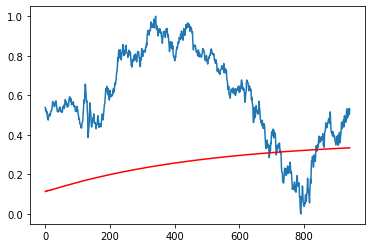

In [46]:
pred_plot(test_scaled_close_data, predictions)

In [47]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [48]:
ar_model = AutoReg(stationary_train_data_close, lags = 942)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [-2.01301060e-04  8.24375473e-01  1.58954110e-01  3.67894620e-03
 -6.40249194e-03 -1.06934754e-02  2.77998938e-02  5.02527704e-02
 -3.15475076e-02 -2.09955073e-02  2.34686173e-02 -3.35055518e-02
 -2.04350968e-02  2.41279329e-02  1.75218634e-02 -2.30875607e-02
  1.57914672e-04  5.24815154e-02 -4.06295724e-02  1.47641915e-02
 -2.27373370e-02 -6.55256525e-03 -1.38974373e-02  7.14168374e-02
 -3.87621717e-02 -4.76057756e-02  3.07224139e-02  2.41380440e-02
  6.30469094e-03  1.45555922e-02 -7.92264060e-02  4.61077463e-02
  2.02224621e-02 -2.56130520e-02 -4.19926213e-02  7.01910869e-02
 -3.19521193e-02  4.66698667e-02 -5.15262619e-02  1.35900255e-03
  1.30049503e-02 -4.11458671e-02 -4.01378724e-02  2.38710883e-01
 -1.88368322e-01  6.50436024e-04  9.99556314e-03 -2.46517448e-02
  6.77160852e-02 -3.95875848e-02  3.16688417e-02 -2.34917581e-02
 -2.06447447e-02  3.15343383e-03  2.66182231e-02  2.56850350e-02
 -1.79516257e-02 -3.91648068e-02  4.80944819e-02  3.38173039e-02
 -5.1894991

In [49]:
predictions = ar_model_fit.predict(start=len(stationary_train_data_close), end=len(stationary_train_data_close)+len(stationary_test_data_close)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], stationary_test_data_close[i]))

predicted=-0.015935, expected=-0.011050
predicted=-0.020669, expected=-0.018460
predicted=-0.022221, expected=-0.015234
predicted=-0.022386, expected=-0.015452
predicted=-0.029547, expected=-0.019209
predicted=-0.029103, expected=-0.018499
predicted=-0.033975, expected=-0.023816
predicted=-0.028701, expected=-0.027558
predicted=-0.032100, expected=-0.027937
predicted=-0.042346, expected=-0.033680
predicted=-0.042735, expected=-0.029761
predicted=-0.036627, expected=-0.024077
predicted=-0.035008, expected=-0.023186
predicted=-0.030887, expected=-0.018696
predicted=-0.034666, expected=-0.019319
predicted=-0.028893, expected=-0.020846
predicted=-0.034474, expected=-0.016768
predicted=-0.040774, expected=-0.017352
predicted=-0.043293, expected=-0.017963
predicted=-0.040980, expected=-0.016482
predicted=-0.038075, expected=-0.013596
predicted=-0.036544, expected=-0.006241
predicted=-0.032089, expected=-0.000396
predicted=-0.034211, expected=-0.001832
predicted=-0.041241, expected=-0.009456


In [50]:
metrics(stationary_test_data_close, predictions)

MSE: 0.0029427519373240894
RMSE: 0.05424713759567494
MAE: 0.04455466830744697


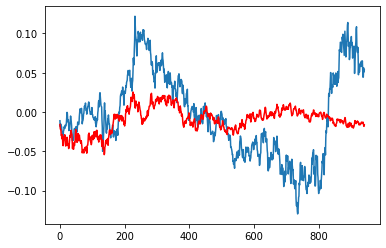

In [51]:
pred_plot(stationary_test_data_close, predictions)

In [52]:
# def train_test_pred_plot(train, test, pred):
#     figure(figsize=(10,6))
#     plt.plot(train, 'green', label='Train data')
#     plt.plot(test, 'blue', label='Test data')
#     plt.plot(pred, 'blue', label='Test predictions')
#     plt.legend()

In [53]:
df_pls = pd.DataFrame({'Values': stationary_test_data_close.flatten()}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [54]:
df_pls2 = pd.DataFrame({'Predictions': predictions}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [55]:
forecast = ar_model_fit.predict(start=train_close_len + test_close_len, end=train_close_len + test_close_len + 730)
df_forecast = pd.DataFrame({'Forecast': predictions}, index=pd.RangeIndex(start=train_close_len + test_close_len, stop=train_close_len + test_close_len + 942, step=1))

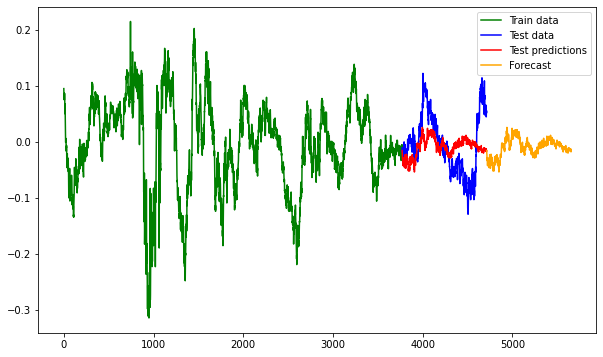

In [56]:
plt.figure(figsize=(10,6))
plt.plot(stationary_train_data_close, 'green', label='Train data')
plt.plot(df_pls['Values'], 'blue', label='Test data')
plt.plot(df_pls2['Predictions'], 'red', label='Test predictions')
plt.plot(df_forecast['Forecast'], 'orange', label = 'Forecast')
plt.legend()

#### Moving Average

In [57]:
df_ma = df_close.copy()

df_ma['MA50'] = df_ma['Close'].rolling(50).mean()
df_ma['MA100'] = df_ma['Close'].rolling(100).mean()
df_ma['MA200'] = df_ma['Close'].rolling(200).mean()

In [58]:
from plotly.offline import iplot 

fig = go.Figure(data=[go.Scatter(x=df_ma.index,
                                 y=df_ma["Close"], 
                                 line = dict(color = "blue"), name="Close"), 
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA50"], 
                                 line=dict(color='orange', width=2), name="MA50"),
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA100"], 
                                 line=dict(color='green', width=2), name="MA100"),
                     go.Scatter(x=df_ma.index,
                                 y=df_ma["MA200"], 
                                 line=dict(color='magenta', width=2), name="MA200")])

fig.update_layout(
    plot_bgcolor = "white",
    title_text="Close Price and its moving average for Europe Exchange"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black",
                title_text="<b>Close and Moving Average</b>")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black", 
                 title_text="<b>Date</b>")



iplot(fig)

In [59]:
df_ma_copy = df_ma.copy()

df_ma_copy.dropna(inplace = True)

In [60]:
metrics(df_ma_copy['Close'], df_ma_copy['MA50'])

MSE: 0.0008979247607819956
RMSE: 0.029965392718634534
MAE: 0.021864190312412393


In [61]:
metrics(df_ma_copy['Close'], df_ma_copy['MA100'])

MSE: 0.0018525225499089822
RMSE: 0.043040940392944274
MAE: 0.031762962892582215


In [62]:
metrics(df_ma_copy['Close'], df_ma_copy['MA200'])

MSE: 0.0039389602437014054
RMSE: 0.06276113641180667
MAE: 0.04917870792077593


#### ARIMA

In [63]:
stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

In [64]:
# TOO HECKING LONG TO RUN FFS :(

# arima_model = pm.arima.auto_arima(stationary_train_data_close, start_p=0, start_q = 0,
#                                   max_p = 5, max_d=5, max_q=5, start_P=0,
#                                   D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
#                                   m=1, season = False, trace = True,
#                                   error_action='ignore',
#                                   suppress_warnings=True,
#                                   stepwise=True,
#                                 #   random_state=20,
#                                   n_fits=10)

In [65]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8263.861, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-20992.173, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12394.702, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-21207.185, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-21238.568, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-21239.556, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-21240.257, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-14967.470, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-21238.797, Time=0.90 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-21239.410, Time=0.63 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-16486.488, Time=1.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-21237.187, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-21238.267, Time=0.37 sec

Best model: 

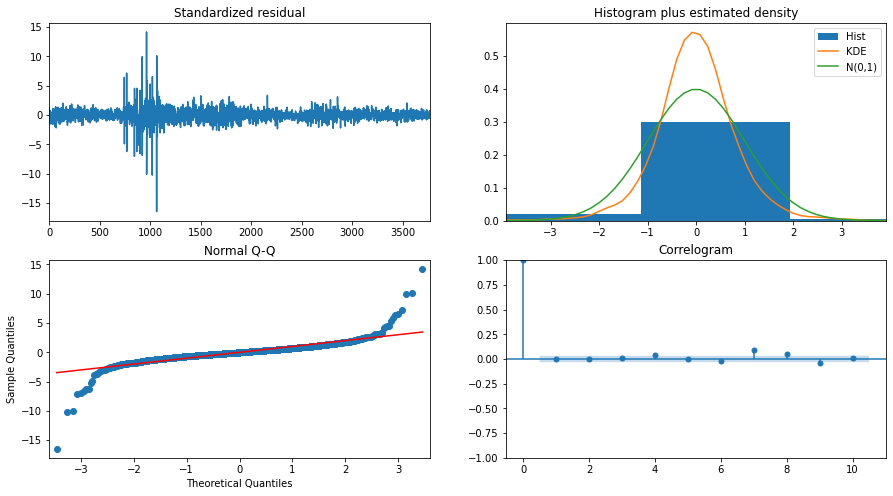

In [66]:
model_autoARIMA = pm.arima.auto_arima(stationary_train_data_close, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [67]:
# ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(3, 1, 2, 3), suppress_warnings=True)

In [68]:
model = ARIMA(stationary_train_data_close, order=(1,0,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3770
Model:                 ARIMA(1, 0, 2)   Log Likelihood               10624.126
Date:                Fri, 28 Apr 2023   AIC                         -21238.251
Time:                        11:18:09   BIC                         -21207.077
Sample:                             0   HQIC                        -21227.167
                               - 3770                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.020     -0.243      0.808      -0.045       0.035
ar.L1          0.9918      0.002    644.285      0.000       0.989       0.995
ma.L1         -0.2663      0.005    -59.067      0.0

In [69]:
predictions = fitted.forecast(942, alpha=0.05)  # 95% conf

In [70]:
stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

In [71]:
fc_series = pd.Series(predictions, index=stationary_test_data_close.index)

In [72]:
metrics(stationary_test_data_close, predictions)

MSE: 0.0028591534701129886
RMSE: 0.053471052637038934
MAE: 0.043519933438676744


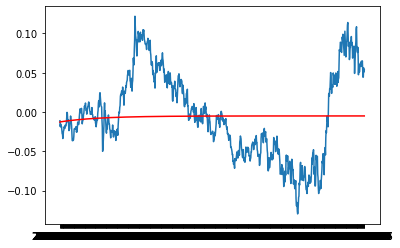

In [73]:
pred_plot(stationary_test_data_close, predictions)

In [74]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [75]:
df_pls = pd.DataFrame({'Values': stationary_test_data_close.flatten()}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [76]:
df_pls2 = pd.DataFrame({'Predictions': predictions}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [77]:
forecast = fitted.predict(start=train_close_len + test_close_len, end=train_close_len + test_close_len + 730)
df_forecast = pd.DataFrame({'Forecast': predictions}, index=pd.RangeIndex(start=train_close_len + test_close_len, stop=train_close_len + test_close_len + 942, step=1))

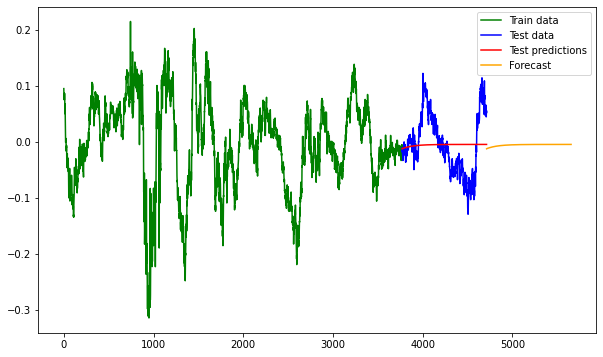

In [78]:
plt.figure(figsize=(10,6))
plt.plot(stationary_train_data_close, 'green', label='Train data')
plt.plot(df_pls['Values'], 'blue', label='Test data')
plt.plot(df_pls2['Predictions'], 'red', label='Test predictions')
plt.plot(df_forecast['Forecast'], 'orange', label = 'Forecast')
plt.legend()

#### SARIMA

In [79]:
stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-11401.617, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-8275.909, Time=0.36 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-20989.110, Time=5.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-14602.878, Time=3.83 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-8263.861, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-20990.240, Time=0.52 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-20989.180, Time=3.49 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-20987.326, Time=6.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=-21205.211, Time=0.79 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=-21203.338, Time=6.66 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=-21203.356, Time=5.27 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=-21202.724, Time=6.98 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-21236.584, Time=0.90 sec


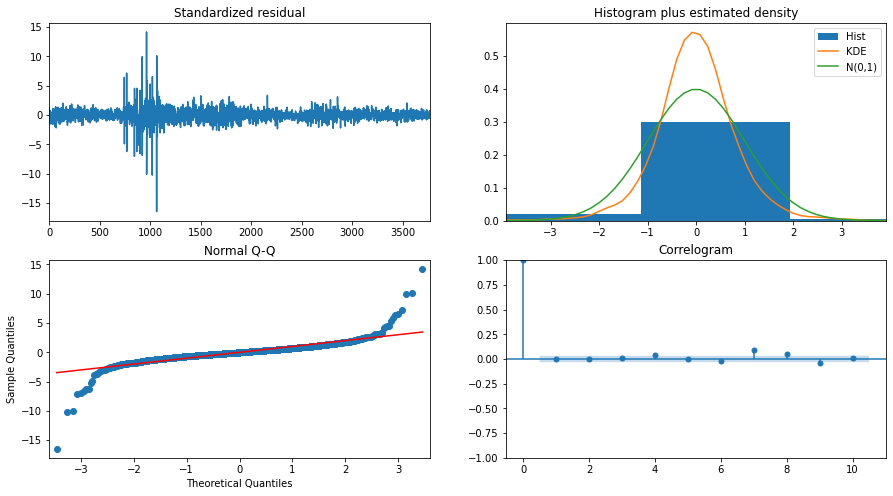

In [80]:
model_autoARIMA = pm.arima.auto_arima(stationary_train_data_close, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [81]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [82]:
print(model_autoARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3770
Model:               SARIMAX(1, 0, 2)   Log Likelihood               10624.128
Date:                Fri, 28 Apr 2023   AIC                         -21240.257
Time:                        11:20:31   BIC                         -21215.318
Sample:                             0   HQIC                        -21231.390
                               - 3770                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9919      0.001    688.835      0.000       0.989       0.995
ma.L1         -0.2663      0.005    -59.105      0.000      -0.275      -0.257
ma.L2         -0.0310      0.010     -3.009      0.0

In [83]:
# model = SARIMA(stationary_train_data_close, order=(1,0,2))  
model = SARIMAX(stationary_train_data_close,order=(1, 0, 2),seasonal_order=(1,1,1,12)) 
fitted = model.fit()  
print(fitted.summary())

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 3770
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood               10556.782
Date:                              Fri, 28 Apr 2023   AIC                         -21101.565
Time:                                      11:20:42   BIC                         -21064.175
Sample:                                           0   HQIC                        -21088.269
                                             - 3770                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9918      0.001    663.772      0.000       0.989       0.995
ma.L1         -0.23

In [84]:
predictions = fitted.predict(2828, alpha=0.05)  # 95% conf

In [85]:
stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

In [86]:
fc_series = pd.Series(predictions, index=stationary_test_data_close.index)

In [87]:
metrics(stationary_test_data_close, predictions)

MSE: 0.005279638696540347
RMSE: 0.07266112231819948
MAE: 0.060730468566152156


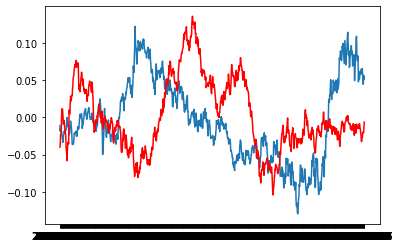

In [88]:
pred_plot(stationary_test_data_close, predictions)

In [89]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [90]:
df_pls = pd.DataFrame({'Values': stationary_test_data_close.flatten()}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [91]:
df_pls2 = pd.DataFrame({'Predictions': predictions}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [92]:
forecast = fitted.predict(start=train_close_len + test_close_len, end=train_close_len + test_close_len + 730)
df_forecast = pd.DataFrame({'Forecast': predictions}, index=pd.RangeIndex(start=train_close_len + test_close_len, stop=train_close_len + test_close_len + 942, step=1))

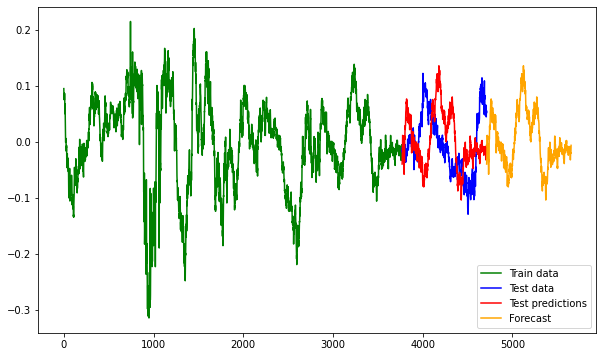

In [93]:
plt.figure(figsize=(10,6))
plt.plot(stationary_train_data_close, 'green', label='Train data')
plt.plot(df_pls['Values'], 'blue', label='Test data')
plt.plot(df_pls2['Predictions'], 'red', label='Test predictions')
plt.plot(df_forecast['Forecast'], 'orange', label = 'Forecast')
plt.legend()

#### ETS

In [94]:
df_copy = df.copy()
df_copy.drop(df_copy.loc[:, 'Open':'Volume'].columns, axis=1, inplace = True)
df_copy.drop(df_copy.loc[:, 'Close_diff2':'Open_diff3'].columns, axis=1, inplace = True)
df_copy.head()

Close_diff1
Date                   
2005-02-25     0.094702
2005-02-28     0.080700
2005-03-01     0.078788
2005-03-02     0.081491
2005-03-03     0.075695

In [95]:
stationary_train_data_close = pd.DataFrame(df_copy['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_copy['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

In [96]:
# stationary_train_data_close = stationary_train_data_close.to_numpy()
# stationary_test_data_close = stationary_test_data_close.to_numpy()

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\stat

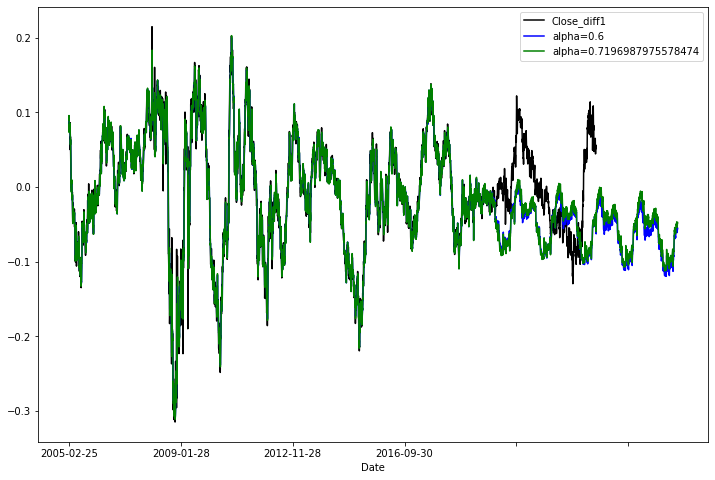

In [97]:
n = 942 + 730
alpha = 0.6
trend = 'add'
seasonal = 'add'
sPeriod = 365

model1 = ExponentialSmoothing(stationary_train_data_close['Close_diff1'], trend, seasonal=seasonal, seasonal_periods=sPeriod).fit(smoothing_level=alpha)
forecast1 = model1.forecast(n).rename('alpha='+str(alpha))

model3 = ExponentialSmoothing(stationary_train_data_close['Close_diff1'], trend, seasonal=seasonal, seasonal_periods=sPeriod).fit()
forecast3 = model3.forecast(n).rename('alpha=%s'%model3.model.params['smoothing_level'])

ax = df_copy.plot(color='black', figsize=(12,8), legend=True)
forecast1.plot(ax=ax, color='blue', legend=True)
model1.fittedvalues.plot(ax=ax, color='blue')
forecast3.plot(ax=ax, color='green', legend=True)
model3.fittedvalues.plot(ax=ax, color='green')
plt.show()